In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
import os

In [2]:
lmax = 2000
Tcmb  = 2.726e6    # CMB temperature in microkelvin?
rlmin, rlmax = 2, 2000 # CMB multipole range for reconstruction
nside = 2048
bstype = 'equi'
nsims = 448 # Number of simulations to average over (in sets of 3) 
ellmin = 2 
ellmax = 2000 ##### check!!!! vs sims
ls, cl_unl, cl_len, cl_phi = np.loadtxt('/home/amb257/kappa_bispec/make_sims_parallel/camb_lencl_phi.txt')
L_lots = np.arange(rlmax+1)
Lfac = (L_lots*(L_lots+1.) / 2 )**2
lcl = cl_len[0:rlmax+1] / Tcmb**2
print('lcl not interp', lcl[lmax])
ucl = cl_unl[0:rlmax+1] / Tcmb**2 #dimless unlensed T Cl
cl_kappa = Lfac * cl_phi[0:rlmax+1]
l_bins = np.arange(0,100,10)
cl_where = cl_kappa[l_bins]
print(cl_where)

lcl not interp 4.6554353095210565e-17
[0.00000000e+00 1.66870490e-07 2.06031272e-07 2.17543630e-07
 2.17004910e-07 2.10657754e-07 2.01537811e-07 1.91161657e-07
 1.80472047e-07 1.69897924e-07]


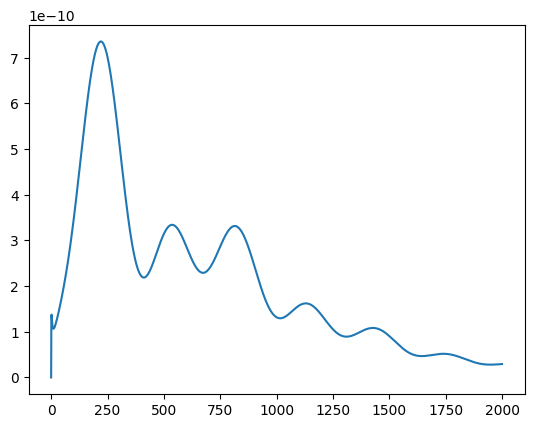

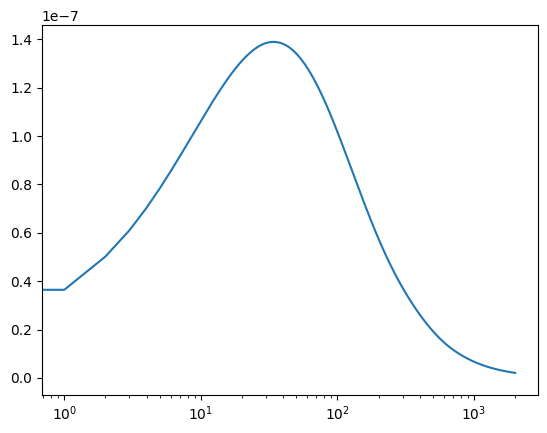

In [3]:
# Running some checks on the power spectra used

# Define the directory where power spec are stored
input_dir = "power_spec"

# Load the power spec
L = np.load(os.path.join(input_dir, "L.npy"))
cl_phi = np.load(os.path.join(input_dir, "cl_phi.npy"))
ucl = np.load(os.path.join(input_dir, "ucl.npy"))
ctot = np.load(os.path.join(input_dir, "ctot.npy"))

plt.plot(L, L*(L+1) / (2*np.pi) *ucl)
plt.show()
plt.plot(L, (L*(L+1))**2*cl_phi /  (2*np.pi))
plt.xscale('log')
plt.show()

[  2.  12.  22.  32.  42.  52.  62.  72.  82.  92. 102. 112. 122. 132.
 142. 152. 162. 172. 182. 192. 202. 212. 222. 232. 242. 252. 262. 272.
 282. 292. 302. 312. 322. 332. 342. 352. 362. 372. 382. 392. 402. 412.
 422. 432. 442. 452. 462. 472. 482. 492. 502. 512. 522. 532. 542. 552.
 562. 572. 582. 592. 602. 612. 622. 632. 642. 652. 662. 672. 682. 692.
 702. 712. 722. 732. 742. 752. 762. 772. 782. 792. 802. 812. 822. 832.
 842. 852. 862. 872. 882. 892. 902. 912. 922. 932. 942. 952. 962. 972.
 982. 992.]
[4.32940809e-16 1.07228881e-19 4.34287752e-21 5.19186566e-22
 1.02706258e-22 2.73249606e-23 8.86213622e-24 3.31481445e-24
 1.38253267e-24 6.28531079e-25 3.06718208e-25 1.58792806e-25
 8.64844481e-26 4.92181927e-26 2.91129347e-26 1.78171605e-26
 1.12395206e-26 7.28551484e-27 4.83969132e-27 3.28661320e-27
 2.27634238e-27 1.60458785e-27 1.14904276e-27 8.34486223e-28
 6.13632637e-28 4.56169943e-28 3.42341037e-28 2.59070813e-28
 1.97502996e-28 1.51543400e-28 1.16940088e-28 9.06936222e-29
 7.

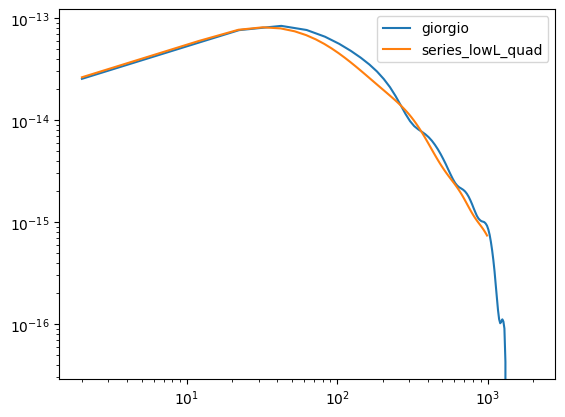

In [4]:
LensingL, testquad = np.loadtxt('No_l_factors_mathematica_TEST_quad_equi.txt')
print(LensingL)
print(testquad)
#LensingL, testdirect = np.loadtxt('TEST_direct_equi.txt')
_, minusincorrect_testquad = np.loadtxt('minusincorrect_TEST_quad_equi.txt')
_, minusincorrect_testdirect = np.loadtxt('minusincorrect_TEST_direct_equi.txt')
# import giorgio results
L_analytic, N2_6pt = np.loadtxt("/home/amb257/kappa_bispec/optimal_est/Plots/data/data_for_paper/numerical_N2/Giorgio_equi_N2_analytic.txt")
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.loglog(LensingL, ((LensingL+1) / LensingL)**2 *1/8*(LensingL*(LensingL+1))**3 * testquad, label='series_lowL_quad')
#plt.loglog(LensingL, -1*testdirect, ls = '--', label='series_lowL_directsum')
#plt.loglog(LensingL, minusincorrect_testquad, label='minusincorrect_series_lowL_quad')
#plt.xlim(1,200)
plt.legend()

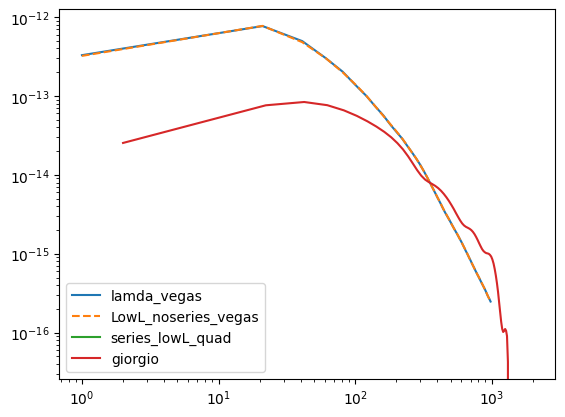

In [5]:
input_dir = "vegas_results"
L = np.load(os.path.join(input_dir, "L.npy"))
lambda_L = np.load(os.path.join(input_dir, "lambda_L.npy"))
lamda_vegas_lowL = np.load(os.path.join(input_dir, "lambda_VEGAS_lowL.npy"))

Lfac_kappa = (0.5*L*(L+1))**3 
lambda_Lfac = (0.5*lambda_L*(lambda_L+1))**3 
vegas_lowL = np.load(os.path.join(input_dir, "VEGAS_lowL.npy"))
nonoise_vegas_lowL = np.load(os.path.join(input_dir, "nonoise_VEGAS_lowL.npy"))

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(lambda_L, lambda_Lfac*lamda_vegas_lowL,label = 'lamda_vegas')
plt.loglog(L, Lfac_kappa*vegas_lowL, ls = '--',label = 'LowL_noseries_vegas')
plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

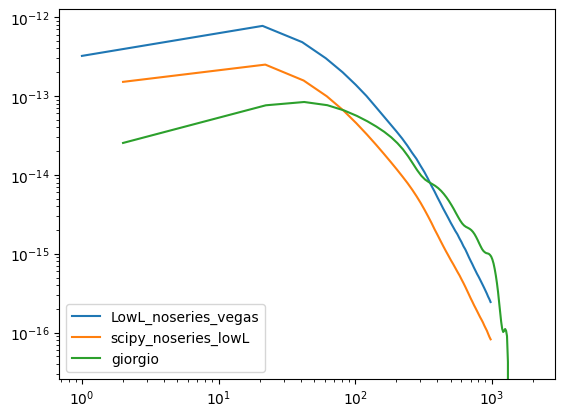

In [6]:
input_dir = "scipy_results"
L_scipy = np.load(os.path.join(input_dir, "L.npy"))

Lfac_kappa_scipy = (0.5*L_scipy*(L_scipy+1))**3 
scipy_lowL = np.load(os.path.join(input_dir, "scipy_lowL_noseries.npy"))
plt.loglog(L, Lfac_kappa*vegas_lowL, label = 'LowL_noseries_vegas')

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(L_scipy, Lfac_kappa_scipy*scipy_lowL, label = 'scipy_noseries_lowL')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

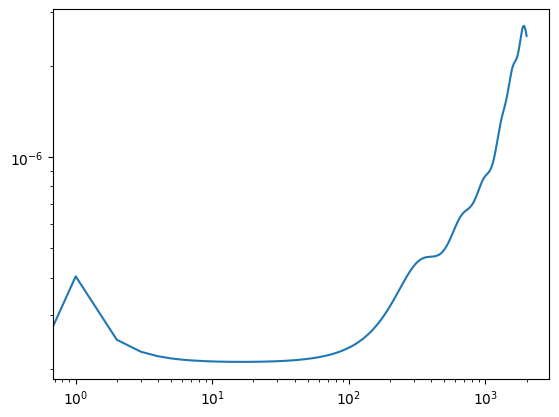

In [7]:
L_norm, norm_phi = np.loadtxt('norm_phi.txt')
Lfac_norm = (0.5*L_norm*(L_norm+1.))**2
plt.loglog(L_norm, Lfac_norm*norm_phi)
#This looks legit.

[  2.  12.  22.  32.  42.  52.  62.  72.  82.  92. 102. 112. 122. 132.
 142. 152. 162. 172. 182. 192. 202. 212. 222. 232. 242. 252. 262. 272.
 282. 292. 302. 312. 322. 332. 342. 352. 362. 372. 382. 392. 402. 412.
 422. 432. 442. 452. 462. 472. 482. 492. 502. 512. 522. 532. 542. 552.
 562. 572. 582. 592. 602. 612. 622. 632. 642. 652. 662. 672. 682. 692.
 702. 712. 722. 732. 742. 752. 762. 772. 782. 792. 802. 812. 822. 832.
 842. 852. 862. 872. 882. 892. 902. 912. 922. 932. 942. 952. 962. 972.
 982. 992.]
[2.57813528e-17 1.12020925e-20 5.77728050e-22 8.09397272e-23
 1.81306401e-23 5.35807383e-24 1.90494869e-24 7.73383692e-25
 3.47347847e-25 1.68871328e-25 8.75836338e-26 4.79363644e-26
 2.74585337e-26 1.63554712e-26 1.00831359e-26 6.40696590e-27
 4.18066936e-27 2.79386013e-27 1.90774900e-27 1.32818421e-27
 9.40912068e-28 6.77066748e-28 4.94134549e-28 3.65249334e-28
 2.73076641e-28 2.06253315e-28 1.57205568e-28 1.20802431e-28
 9.35077913e-29 7.28548348e-29 5.70996331e-29 4.49940069e-29
 3.

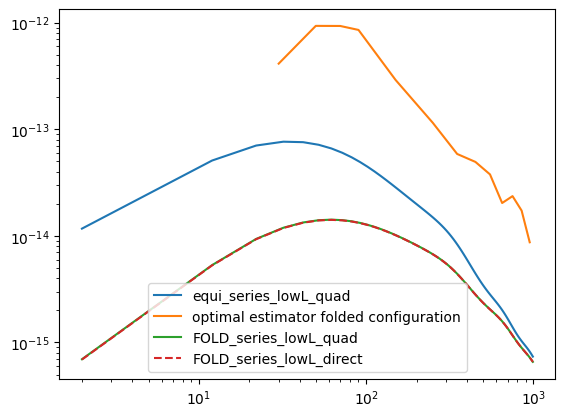

In [14]:
""" Now test folded series expansion N2 """

LensingL_fold, quad_fold = np.loadtxt('quad_fold.txt')
LensingL_fold, direct_fold = np.loadtxt('direct_fold.txt')
print(LensingL_fold)
print(quad_fold)

L_opt_fold, opt_est_fold = np.loadtxt('folded_opt_est.txt')
plt.loglog(LensingL, 1/8*(LensingL*(LensingL+1))**3 * testquad, label='equi_series_lowL_quad')
plt.loglog(L_opt_fold, -1*opt_est_fold, label = 'optimal estimator folded configuration')
plt.loglog(LensingL_fold, 1/8*(LensingL_fold*(LensingL_fold+1))**3*quad_fold, label='FOLD_series_lowL_quad')
plt.loglog(LensingL_fold, 1/8*(LensingL_fold*(LensingL_fold+1))**3*direct_fold, ls = '--', label='FOLD_series_lowL_direct')
#plt.loglog(LensingL_fold_2000_nonoise, -1*testquad_fold_2000_nonoise, ls = '--',label='series_lowL_quad')
#plt.loglog(LensingL, -1*testdirect, ls = '--', label='series_lowL_directsum')
#plt.loglog(LensingL, minusincorrect_testquad, label='minusincorrect_series_lowL_quad')
#plt.xlim(1,200)
plt.legend()

In [9]:
L, out = np.loadtxt('SERIES_lowLN2_out.txt')
L, full_int_out = np.loadtxt('lowLN2_out.txt')
plt.loglog(L_analytic, N2_6pt)
plt.loglog(L, out, label = 'series')
plt.plot(L, full_int_out, label = 'full')
plt.xlim(2,100)
#plt.ylim(1e-13,1e-8)
plt.legend()
plt.ylabel('N2')
#plt.yscale('log')

OSError: SERIES_lowLN2_out.txt not found.

In [ ]:
L, int = np.loadtxt('series_integrand.txt')
plt.plot(L, int)
print(int)
print(np.sum(int))

OSError: series_integrand.txt not found.

In [ ]:
# Load in the integrand used for the direct sum calculation
ell, integrand = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt')
plt.plot(ell, integrand)
print(np.sum(integrand))
integral = np.trapz(integrand, ell)
print(integral)
plt.xlim(500,800)

: 

In [ ]:
L, direct_int = np.loadtxt('new_direct_sum_integeral.txt')
#L, direct_int = np.loadtxt('integral_direct_sum_10.0.txt')
plt.plot(L, direct_int)
plt.xlabel('L')
print(direct_int)

: 

In [ ]:
plt.loglog(L_lots, cl_kappa**2)
plt.xlim(20,1000)

: 

: 

In [ ]:
L, ctotprime = np.loadtxt('ctotprime.txt')
L, lclprime = np.loadtxt('lclprime.txt')
L, lcldoubleprime = np.loadtxt('lcldoubleprime.txt')
L, lcl = np.loadtxt('lcl.txt')
L, ocl = np.loadtxt('ocl.txt')
plt.plot(L, L* lclprime / lcl, label='lclprime')
plt.plot(L, L* ctotprime / lcl, label = 'ctotprime')
plt.xscale('log')
plt.legend()

: 

In [ ]:
plt.plot(L, L* ctotprime / lcl - L* lclprime / lcl)

: 

In [ ]:
plt.loglog(L, lcl, label = 'lcl')
plt.loglog(L, ocl-lcl, label = 'ocl-lcl')
plt.legend()

: 

In [ ]:
print(lcl[0:2])
print(ocl[0:2])

: 

In [ ]:
plt.plot(L, L**2 / lcl * lcldoubleprime)

: 

In [ ]:
import numpy as np
from numpy import random 
from scipy.integrate import quad
# Define a random integrand
def integrand_fn(ell):
    integrand = 1e-11*np.cos(ell / 100) * np.sin(ell / 300) + random.rand()*1e-12
    return integrand

# Set integration limits
ellmin = 2
ellmax = 100

integrand_values = []
for ell in np.arange(ellmin, ellmax + 1):
    integrand = integrand_fn(ell)
    integrand_values.append(integrand)

# Now write some code to integrate this using quad
integral_quad, error = quad(integrand_fn, ellmin, ellmax, limit=1000)

# Now compute the same integrand using direct summation
integral_direct_sum = np.sum(integrand_values)

print('quad', integral_quad)
print('direct sum', integral_direct_sum)

: 

In [ ]:
ell = np.arange(ellmin, ellmax + 1)
plt.plot(ell, integrand_values)


: 

: 